# London Housing and Population Analysis (2002 - 2015 data)

## 2. EDA Level == 'English Region'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
regional_view = pd.read_csv('C:/Users/csmyth/Desktop/Code/london_housing_eda/regions_dataset.csv')

# Confirm data set structure
regional_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           225 non-null    object 
 1   date           225 non-null    object 
 2   average_price  225 non-null    float64
 3   houses_sold    225 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.2+ KB


In [3]:
regional_view['date'] = pd.to_datetime(regional_view['date'])
regional_view['date'] = regional_view['date'].dt.strftime('%Y')

first = regional_view['date'].min()
last = regional_view['date'].max()

# Compare regions:
mean_regional_price = regional_view.groupby('area')['average_price'].mean().astype('int64').sort_values(ascending=True).reset_index()
mean_regional_sales_count = regional_view.groupby('area')['houses_sold'].mean().astype('int64').reset_index()
averages = pd.merge(mean_regional_price, mean_regional_sales_count, how='left', on='area')
print(averages)

                   area  average_price  houses_sold
0            north east          96938        41347
1            north west         108593       115811
2  yorks and the humber         108912        87350
3         east midlands         121391        81348
4         west midlands         126852        85159
5            south west         163039       105586
6       east of england         170784       112392
7            south east         196018       167804
8                london         264777       125375


London is by far most expensive region, yet average number of houses sold in London is below that of the South East and is almost matched by North West. 

The P15Y housing picture in Yorshire is similar to that in the Midlands.

<Figure size 432x288 with 0 Axes>

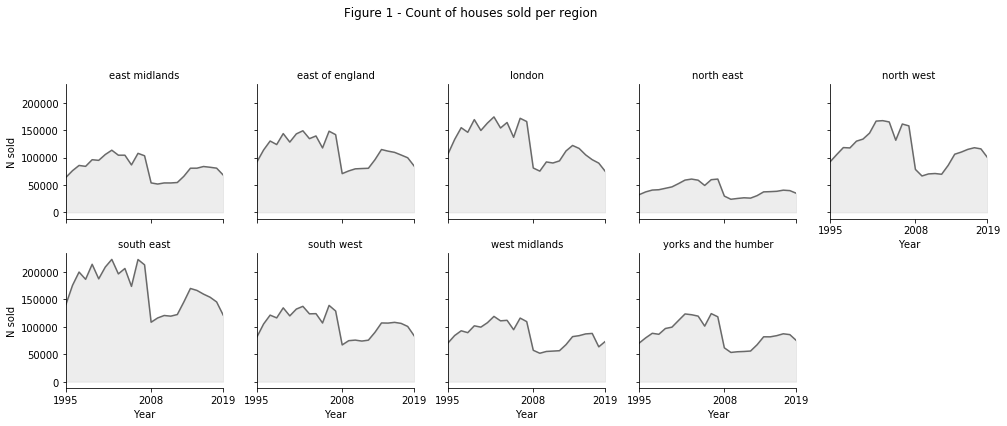

In [4]:
# Show trends in annual sales per region
g = plt.figure()
g = sns.FacetGrid(regional_view, col='area', col_wrap=5,)
g = g.map(plt.plot, 'date', 'houses_sold', color='dimgrey').set(xlim=(first, last), xticks=['1995', '2008', '2019'])
g = g.map(plt.fill_between, 'date', 'houses_sold', alpha=0.2, color='darkgrey')
g = g.set_titles("{col_name}")
g = g.set_axis_labels('Year', 'N sold')

plt.subplots_adjust(top=0.8, left=0.125)
g = g.fig.suptitle('Figure 1 - Count of houses sold per region')
plt.show()
# plt.savefig('Fig1_annual_house_sale_count_per_region.png')

The 2008 financial crisis is noticeable from house sales across England.